In [1]:
# This is a tutorial for BrainEx's built-in saving and loading functions. 
# First, let's create a BrainEx Engine and Preprocess a dataset. 
from brainex.utils.gxe_utils import from_csv
data = './ItalyPower.csv'
brainExEngine = from_csv(data, feature_num = 0, num_worker = 2, use_spark = False, driver_mem = 4, max_result_mem = 2, _rows_to_consider=12)

msg: from_csv, feature num is 0, auto-generating uuid
Not using z-normalization
 Genex Engine: Using Python Native Multiprocessing


In [2]:
brainExEngine.build(st = 0.1)

{'self': <brainex.database.BrainexEngine.BrainexEngine object at 0x7f8ce5b27210>, 'st': 0.1, 'dist_type': 'eu', 'loi': None, 'verbose': 1, '_group_only': False, '_use_dss': True, '_use_dynamic': False}


In [6]:
# Now we have a BrainEx Engine object that has already been built. 
# We can now save this object for later. 
brainExEngine.save('~/savelocation') # The only parameter of the save function is the path you want the object saved to.

In [8]:
# Now let's use Python's os library to check if the engine saved.
import os
os.listdir('~/savelocation')

['subsequences.gxe',
 'conf.json',
 'clusters.gxe',
 'cluster_meta_dict.gxe',
 'data_normalized.gxe',
 'build_conf.json',
 'data_original.gxe']

In [12]:
# Looks about right so let's try loading the engine we just saved. 
# For this we'll use BrainEx's other BrainEx engine object creation function: from_db
from brainex.utils.gxe_utils import from_db
newEngine = from_db('~/savelocation', num_worker = 2)

 Genex Engine: Using Python Native Multiprocessing


In [21]:
# We now have our saved, then loaded, engine ready for use in the newEngine variable. Let's try querying.
queryseq = newEngine.get_random_seq_of_len(12, seed=1)
results = newEngine.query(query = queryseq, best_k = 5)

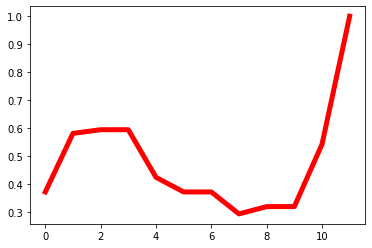

In [22]:
import matplotlib.pyplot as plt
# Here is the query sequence
plt.plot(queryseq.fetch_data(newEngine.data_normalized), linewidth=5, color='red')

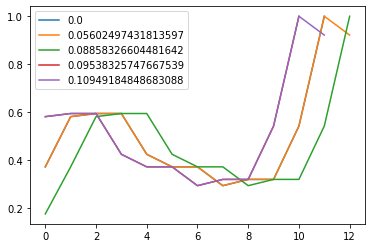

In [23]:
# And here are the results
for res in results:
    plt.plot(res[1].fetch_data(newEngine.data_normalized), label=str(res[0]))
plt.legend()
plt.show()